In [6]:
%matplotlib inline
%pylab inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1

from sklearn import metrics
from IPython.display import display


Populating the interactive namespace from numpy and matplotlib


Вставьте код в класс, приведённый ниже. В итоге должен получиться бустинг над деревьями.

In [14]:
class SimpleGB(BaseEstimator):
    def __init__(self, tree_params_dict, iters=100, tau=1e-1):
        self.tree_params_dict = tree_params_dict
        self.iters = iters
        self.tau = tau
        
    def fit(self, X_data, y_data):
        self.estimators = []
        curr_pred = 0
        for iter_num in range(self.iters):
            # insert code here
            est = GradientBoostingClassifier(n_estimators=200, max_depth=3)
            
            self.estimators.append(algo)
    
    def predict(self, X_data):
        res = np.zeros(X_data.shape[0])
        for estimator in self.estimators:
            res += estimator.predict(X_data)
        return res

## Проверка качества полученного класса

Можете поиграться с параметрами, посмотрим, у кого самое лучшее качество получится

Сгенерируем данные с линейной зависимостью

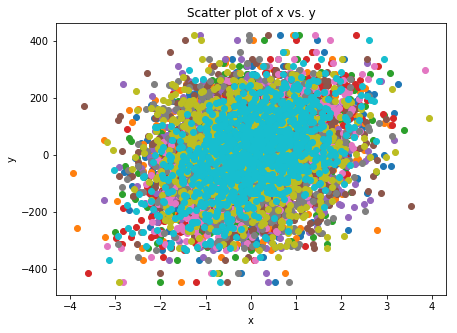

In [15]:
X_data, y_data = make_regression(n_samples=1000, noise=10, n_features=10, random_state=42)
plt.figure(figsize=(7,5))
plt.plot(X_data,y_data, 'o')
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [16]:
algo = SimpleGB(
    tree_params_dict={
        'max_depth':4
    },
    iters=100,
    tau = 0.1
)

In [17]:
np.mean(cross_val_score(algo, X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

AttributeError: 'SimpleGB' object has no attribute 'estimators'

In [ ]:
np.mean(cross_val_score(DecisionTreeRegressor(max_depth=4), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

In [ ]:
np.mean(cross_val_score(LinearRegression(), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

на реально-линейной зависимости не дотягивает до линейной модели, но уже существенно лучше чем одно дерево.

И аналогично, сгенерируем нелинейную зависимость

In [ ]:
X_data, y_data = make_friedman1(n_samples=1000, noise=10, n_features=10, random_state=42)

In [ ]:
algo = SimpleGB(
    tree_params_dict={
        'max_depth': 1
    },
    iters=100,
    tau=0.1
)

In [ ]:
np.mean(cross_val_score(algo, X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

In [ ]:
np.mean(cross_val_score(DecisionTreeRegressor(max_depth=6), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

In [ ]:
np.mean(cross_val_score(LinearRegression(), X_data, y_data, cv=5, scoring='neg_mean_squared_error'))

### Финальный код оценки качества (вам нужно GB реализовать и подобрать хорошие tree_params)

In [ ]:
tree_params_dict = {} # TODO
iters = 100 #TODO
tau = 0.1 # TODO

algo = SimpleGB(
    tree_params_dict=tree_params_dict,
    iters=iters,
    tau=tau
)
print(np.mean(cross_val_score(algo, X_data, y_data, cv=5, scoring='neg_mean_squared_error')))